### Natural Language Processing: Assignment 1

##### This is demo program which give you idea about how to start  your assignment.

In [ ]:
## for installing UrduHack
!pip install urduhack[tf]

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


##### Reading File

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import csv

with open('sent-test.txt', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    passage = list(reader)
f.close()
text = passage[0][0]
text = 'عالیہ جا رہی تھی کہ ایکسیڈنٹ ہو گیااسکو ہسپتال لےجایا گیا'
print(text)

##### Segmentation using UrduHack

In [ ]:
import urduhack
urduhack.download()
from urduhack.tokenization import sentence_tokenizer

sentences = sentence_tokenizer(text)
sentences

In [ ]:
len(sentences) 

#### Reading Segmented File

In [ ]:
with open('sent-segmented.txt', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    segmented = list(reader)
f.close()

In [ ]:

seg_text = segmented[0][0]
sents = seg_text.split('۔')
len(sents)

In [ ]:
from urduhack.tokenization import word_tokenizer

w_list = word_tokenizer(seg_text)

In [ ]:
w_list

# Methodology [Own Code Starts Here]
The total code is divided into 3 parts:
* First the text is corrected for errors like spaces etc. 
* Then the tokenized text is passed into sentence segmenter
* The the accuracy is calculated by tokenizing the data

## First Part - Pre-processing:

Pre-processing takes in the raw string and performs basic processing on it. Some of the examples of the processing are given below: 
* Main idea is to separate everything by spaces for next step.
* if an exclamation mark, question mark appears like <word>! <word>, it is converted into <word> ! <word>
* if there is a hyphen, it is connected to the last word so that the sentence may be segmented properly. 
* The quotation marks are replaced by blanks as they are not impacting sentence segmentation
* Any numeric number i.e. 1,2,3,4... are separated from other text to exist as indepednent entity. 
* The modified string is then returned back. 

## Second Part - Segmentation:

Segmentation takes in the modified text string processed by pre-processor. It performs following actions: 
* It maintains a list of conjunctions and end words 
* It splits the string into lists based on space and strips down any excess spaces
* In a loop iterating through the list, it seggregates the list based on following rules:
  * If there's a hyphen, seggregate
  * If there's one or more question mark or exclamation marks, it considers all marks and then seggregates 
  * It seggregates if there are extra spaces between text
  * It checks for the end words and then seggregates if:
    * It is not followed by a conjunction
    * It is not followed by another end word
    * It is not followed by a ?, !, and comma as there exists a rule for that already 
  * It splits for any new line character. 


## Third Part - Accuracy Testing
For accuracy testing, I took 3 differnt passages from internet. In a dictionary, I kept the following information for each passage: 
  * Id
  * Tokenized sentences in a list
  * Raw passage

The Raw passage is passed to the algorithm and accuracy is calculated based on tokenized sentences. 

### How to test accuracy? 
Due to multiple changes in text like spaces etc, it was not possible to match strings. Hence I used Levenshtein similarity algorithm to find similarity between the generated and tokenized strings. The results are then averaged for the complete string. 

Another, not-so-good method was to compare the output (number of sentences) of the algorithm to output of Urduhack. So I ran the algorithm for all 1195 passages and the results were saved in a pickle file which is being retrieved at the end of this file and graphs are generated for it. 

### Observations and Further Improvements:
* The Word Tokenization can be further looked into. A Dictionary can be created for urdu words and tokenization can be done using greedy algorithm. Major constraint in this task was lack of a good word tokenizer. 

* The research prospects in urdu NLP are high as no proper library is available.UrduHack library, though well designed, requires improvements. 




#### Your Sentence Segmentation Code

In [76]:
def pre_processing(text):
  '''
  Takes text string and performs some processing on it in terms of punctuation marks, numbers, spaces etc. 
  Returns a modified text string. 
  
  '''

  for i in range(len(text)-1):
    if((text[i]=="!") & (text[i+1]!=" ")):
      text = text[:i]+" "+"!"+" "+text[i+1:]
  for i in range(len(text)-1):
    if((text[i]=="؟") & (text[i+1]!=" ")):
      text = text[:i]+" "+"؟"+" "+text[i+1:]
  for i in range(len(text)-1):
    if((text[i]=="۔") & (text[i+1]!=" ")):
      text = text[:i]+"۔"+" "+text[i+1:]
  for i in range(len(text)-1):
    if((text[i]=="۔") & (text[i+1]==" ")& (text[i-1]==" ")):
      text = text[:i]+"۔"+" "+text[i+1:]
  text = text.replace('‘',' ').replace('’',' ')
  for i in range(len(text)-1):
    if(text[i] in ['1','2','3','4','5','6','7','8','9','0']):
      text = text[:i]+" "+text[i]+" "+text[i+1:]
  return text

In [82]:
def sentence_tokenization(text):
  '''
  Takes into account a text passage which is already tokenized and separated by blanks 
  Computes the Sentence tokens and returns: 
  a. Urduhack's tokenized sentences 
  b. Own Algorithm's tokenized sentences
  c. Tokenized list of words
  d. The text passage. 
  '''
  urdu_conjunctions = ['جنہیں', 'جس', 'جن', 'جو', 'اور', 'اگر', 'اگرچہ', 'لیکن', 'مگر', 'پر', 'یا', 'تاہم', 'کہ', 'کر',
                        'تو', 'گے', 'گی','جسے','تاکہ','اسے','جب','وہ','جہاں','جبکہ','بلکہ','کیونکہ']
  urdu_endings = ['کیجیے', 'کیجئے', 'گئیں', 'تھیں', 'ہوں', 'خریدا', 'گے', 'ہونگے', 'گا', 'چاہیے', 'ہوئیں', 'گی',
                        'تھا', 'تھی', 'تھے', 'ہیں','ہے','جاسکے','بنیں','گئی','گیا','دیا','جائیں','چاہئے','کھایا','رہا','سکے',' کرسکے']
  try:
    #import nltk
    #nltk.download()
    import urduhack
    urduhack.download()
    from urduhack.tokenization import sentence_tokenizer
  except:
    !pip install urduhack[tf]
    import urduhack
    urduhack.download()
    from urduhack.tokenization import sentence_tokenizer

  a = ""   #This is the interim string that will be concatenated until the sentence end condition is met.
  b = []   #This will be the final set of lists. 
  splitted = text.split()
  splitted = [x.strip() for x in splitted if x!=" "]
  for j,i in enumerate(splitted):
    '''
    The splitted now contains the tokenized list of words that are stripped to avoid any spaces.
    * The Following are the conditions that are checked:
      * if there is a dash, split sentence
      * if there is a question mark or exclamation mark, then split
      * If there are multiple spaces, it is assumed there is a sentence break
      * if there is an element of sentence ending that is not followed by a conjunction, the sentence is broken
      * if there is a new line, the sentence is broken.
    '''
    a = a+i+" "   
    if("۔" in i):
      if(len(a)>2):
        b.append(a)
      a = ""
    if(("؟" in i) and splitted[min(j+1,len(splitted)-1)][0]!="؟" ):
      if(len(a)>2):
        b.append(a)
        a = ""
    if(("!" in i) and (splitted[min(j+1,len(splitted)-1)][0]!="!" )):
      if(len(a)>2):
        b.append(a)
        a = ""
    elif((splitted[j]==" ") and (splitted[min(j+1,len(splitted)-1)]==" ")):
      b.append(a)
      a = ""
    elif((splitted[j] in urdu_endings) and (splitted[min(j+1,len(splitted)-1)] not in urdu_conjunctions ) and (splitted[min(j+1,len(splitted)-1)] not in urdu_endings ) and (splitted[min(j+1,len(splitted)-1)] not in ["؟","!","۔",'،']) and (splitted[min(j+1,len(splitted)-1)].strip()[:-1] not in urdu_conjunctions ) and (splitted[min(j+1,len(splitted)-1)].strip()[:-1] not in urdu_endings )):
      if(len(a)>0):
        b.append(a)
        a = ""
    elif(i=="\n"):
      if(len(a)>0):
        b.append(a)
        a = ""
  
  if(len(a)>0):
    try:
      b[-1] = b[-1]+" "+a  
      # This is to append whatever is left in case the sentence break conditions are not met. 
      #They are appended to the last element of final list. 
    except:
      print(b)  #In case this gives error, it means the passage doesnt satisfy any condition that breaks a sentence. 
                #In that case the passage is printed. and splitted words are printed. 
      print(splitted)

  sentences = sentence_tokenizer(text)  #Calling the 
  print("Total Sentences from own algorithm",len(b))
  print("[Reference] Sentences from Urduhack",len(sentences))
  return [sentences,b,splitted,text]

def write_file(filename,arrayname):
  
  '''
  Writes the array in a file 

  '''
  with open(filename, 'w') as filehandle:
    for listitem in arrayname:
        filehandle.write('%s\n' % listitem)

def calculate_similarity(ownres,reference_Passage_1_0):
  '''
  Calculates Levenshtein similarity between two strings. First argument is taken as the target and second is taken as the reference
  Returns a list of Levenshtein ratios corresponding to each sentence of target.
  
  '''
  try:
    import Levenshtein
  except:
    !pip install python-Levenshtein
    import Levenshtein

  sent_lev = []
  for i in ownres:
    lev = 0
    for j in reference_Passage_1_0:
        if(Levenshtein.ratio(i,j)>lev):
          lev = Levenshtein.ratio(i,j)
    sent_lev.append(lev)
  return sent_lev


#### Compute Accuracy and Print Results

Following json contains 3 different passages taken following links: 

1. https://urdu.geo.tv/latest/248893-
2. https://jang.com.pk/news/899433
3. https://jang.com.pk/news/898298


The links are tokenized manually and are being used as a reference. 

p.s. you can add your own passages in this string to check

---











In [83]:
#Kindly add your texts using same template. 

samples={
    
    "passages": [{
        
        "number":1,
        "tokenized" : ['وزیراعظم کے معاون خصوصی ڈاکٹر فیصل سلطان کی جانب سے بھی اس خبر کی تصدیق کر دی گئی ہے۔','ڈاکٹر فیصل سلطان کاکہنا ہے کہ وزیراعظم عمران خان کا کورونا ٹیسٹ مثبت آیا جس کے بعد وہ اپنے گھر میں ہی قرنطینہ میں چلے گئے ہیں۔','وزیراعظم نے دو دنوں میں کس کس سے ملاقاتیں کیں؟  ','وزیراعظم نے جمعرات کو ویکسین لگوائی اور پھر اسی دن اسلام آباد میں ہاؤسنگ اسکیم کا افتتاح بھی کیا جس میں زلفی بخاری سمیت دیگر لوگ ان کے ساتھ موجود تھے۔','اس کے بعد وزیراعظم نے کویت کے وزیرخارجہ سے بھی ملاقات کی جس میں ان سے دستاویزات کا بھی تبادلہ ہوا۔',' اس کے علاوہ وزیراعظم عمران خان نے گزشتہ روز سوات موٹر وے کا دورہ بھی کیا تھا اور اس موقع پر وزیر مواصلات مراد سعید اور وزیراعلیٰ خیبر پختونخوا محمود خان بھی موجود تھے۔ ','انڈس اسپتال کے سی ای او  ڈاکٹر عبدالباری کا جیو نیوز سے گفتگو کرتے ہوئے کہنا تھا کہ ویکسین لگنے کے بعد کورونا مثبت نہیں آتا، وزیراعظم کو ویکسین لگانے سے قبل ہی کورونا کا ایکسپوژر ہوا ہو گا کیونکہ ویکسین لگانے کے بعد کورونا نہیں ہوتا۔','ڈاکٹر عبدالباری کا کہنا تھا کہ ویکسین لگنے کے 2 سے 3 ہفتوں کے بعد اینٹی باڈیز بننا شروع ہوتی ہیں اسی لیے چینی ویکیسین کی دو ڈوز لگائی جاتی ہیں تاکہ اینٹی باڈیز  زیادہ بن جائیں۔','ان کا کہنا ہے کہ امید ہے کہ وزیراعظم کو علامات بہت کم ہوں گی کیونکہ وہ خود کو فٹ بھی رکھتے ہیں اور آنے والے دنوں میں ان کی اینٹی باڈیز بھی بننا شروع ہو جائیں گی۔'],
        "raw" : """وزیراعظم کے معاون خصوصی ڈاکٹر فیصل سلطان کی جانب سے بھی اس خبر کی تصدیق کر دی گئی ہے ڈاکٹر فیصل سلطان کاکہنا ہے کہ وزیراعظم عمران خان کا کورونا ٹیسٹ مثبت آیا جس کے بعد وہ اپنے گھر میں ہی قرنطینہ میں چلے گئے ہیں وزیراعظم نے دو دنوں میں کس کس سے ملاقاتیں کیں؟  وزیراعظم نے جمعرات کو ویکسین لگوائی اور پھر اسی دن اسلام آباد میں ہاؤسنگ اسکیم کا افتتاح بھی کیا جس میں زلفی بخاری سمیت دیگر لوگ ان کے ساتھ موجود تھے اس کے بعد وزیراعظم نے کویت کے وزیرخارجہ سے بھی ملاقات کی جس میں ان سے دستاویزات کا بھی تبادلہ ہوا  اس کے علاوہ وزیراعظم عمران خان نے گزشتہ روز سوات موٹر وے کا دورہ بھی کیا تھا اور اس موقع پر وزیر مواصلات مراد سعید اور وزیراعلیٰ خیبر پختونخوا محمود خان بھی موجود تھے  انڈس اسپتال کے سی ای او  ڈاکٹر عبدالباری کا جیو نیوز سے گفتگو کرتے ہوئے کہنا تھا کہ ویکسین لگنے کے بعد کورونا مثبت نہیں آتا، وزیراعظم کو ویکسین لگانے سے قبل ہی کورونا کا ایکسپوژر ہوا ہو گا کیونکہ ویکسین لگانے کے بعد کورونا نہیں ہوتا ڈاکٹر عبدالباری کا کہنا تھا کہ ویکسین لگنے کے 2 سے 3 ہفتوں کے بعد اینٹی باڈیز بننا شروع ہوتی ہیں اسی لیے چینی ویکیسین کی دو ڈوز لگائی جاتی ہیں تاکہ اینٹی باڈیز  زیادہ بن جائیں ان کا کہنا ہے کہ امید ہے کہ وزیراعظم کو علامات بہت کم ہوں گی کیونکہ وہ خود کو فٹ بھی رکھتے ہیں اور آنے والے دنوں میں ان کی اینٹی باڈیز بھی بننا شروع ہو جائیں گی """       
    },
    {
        
        "number":2,
        "tokenized": ['آخر کار پی ڈی ایم میں نہ پُر ہونے والا شگاف پڑ گیا',' جو لوگ نہیں مانتے تھے وہ بھی تسلیم کر رہے ہیں کہ پوری اپوزیشن پر بھاری کون پڑا؟',' کس نے اپنے کارڈز موثر انداز میں حکمت عملی کے ساتھ کھیلے؟',' اپنے مہروں کی جنبش سے سب کو مات دی اور کس کی ہار کو اپنی جیت میں تبدیل کیا؟',' اگر دیکھا جائے تو فی الوقت تو سب سے بڑا سیاسی خسارہ پاکستان مسلم لیگ (ن) کو ہوا ہے اور پھر جے یو آئی کو۔',' لگتا ہے کہ مولانا فضل الرحمٰن تو کسی نہ کسی طرح اس خسارے کو پورا کر لیں گے لیکن مسلم لیگ (ن) کے لئے آنے والا وقت کڑی آزمائش کا ہے۔ ','صرف چھ ماہ پہلے وجود میں آنے والا سیاسی اتحاد جس طرح اپنے اختتام یا انجام کو پہنچا ہے اس سے سیداستدانوں کے قول و فعل میں تضاد، خود غرضی اور جمہوریت کے مستقبل کا اندازہ بخوبی لگایا جا سکتا ہے',' لیکن یہ تاثر بھی پوری شدت کے ساتھ موجود ہے کہ جو پی ڈی ایم سے باہر ہوا اور جس جماعت نے بغاوت کی وہ ابتدائی سطح پر ہی پی ڈی ایم میں حقیقی طور پر شامل نہیں تھا بلکہ اس نے وہی کچھ کیا جو پہلے سے طے تھا۔',' یوں تو پی ڈی ایم میں اختلاف کی افواہیں اس کی تشکیل کے ساتھ ہی شروع ہو گئی تھیں لیکن یہ افواہیں وقت گزرنے کے ساتھ ساتھ خبریں اور ’’بریکنگ نیوز‘‘ بھی بننے لگیں اور منگل کو جب پی ڈی ایم کا سربراہی اجلاس شروع ہوا تو اجلاس کے اندر سے ہی جو خبریں آرہی تھیں ان سے صورتحال واضح ہو رہی تھی',' لیکن اپوزیشن کے پارٹی ترجمان اور دیگر رہنما اس بات پر مصر تھے کہ جب تک اجلاس کے اختتام پر پریس کانفرنس نہیں ہوتی۔','اس طرح کی افواہیں پھیلتی رہیں گی',' بعض رہنمائوں اور ترجمانوں نے تو یہ الزام بھی میڈیا پر عائد کردیا کہ پی ڈی ایم میں تقسیم کی چلنے والی خبریں ایجنسیوں کے کہنے پر چلائی جا رہی ہیں',' لیکن جب پی ڈی ایم میں شامل جماعتوں کے صدر اور مرکزی رہنما پریس کانفرنس کے لئے سامنے آئے تو ان کے چہرے پر سب کچھ لکھا پڑھا جا رہا تھا،',' تاہم پھر بھی مولانا فضل الرحمٰن نے اپنی مختصر گفتگو میں اجلاس کے دوران پیپلز پارٹی کے طرز عمل کو غیر جمہوری کہتے ہوئے اجلاس کی ساری صورتحال بیان کردی اور دوسرے لفظوں میں 26مارچ کو ہونے والا لانگ مارچ غیرمعینہ مدت تک کے لئے ملتوی کرنے کا اعلان کرتے ہوئے وہاں سے رخصت ہو گئے اور مریم نواز کے اصرار کے باوجود انہوں نے پلٹ کر بھی نہ دیکھا۔',' آصف علی زرداری نے پی ڈی ایم میں شامل ہو کر محض چند ماہ میں وہ کچھ حاصل کر لیا جو شاید انہیں برسوں کی سیاست میں بھی حاصل نہیں ہوتا۔','انہوں نے اپوزیشن کی سب سے بڑی جماعت پاکستان مسلم لیگ (ن) جس کے ساتھ ان کی مخالفت سیاسی انتہا تٰک رہی ہے اور اس کا اندازہ مسلم لیگ (ن) کے رہنمائوں اور سابق وزیراعظم نواز شریف اور شہباز شریف کے بیانات اور اقدامات سے بخوبی لگایا جا سکتا ہے انہوں نے اس وزیراعظم کی صاحبزادی مریم نواز سے پاکستان پیپلز پارٹی زندہ باد کے نعرے بھی لگوا دیے، لاڑکانہ میں محترمہ بینظیر بھٹو کی برسی پر مسلم لیگ (ن) کی رہنما کی جانب سے ذوالفقار علی بھٹو اور محترمہ بےنظیر بھٹو کو ’’شہید‘‘ کہلوا دیا اور شاید اب وہ کبھی عمران، زرداری بھائی بھائی کا نعرہ نہیں لگوا سکیں گی اور یہی تقاریر اور سلوگنز اور نعرے ان کی مستقبل کی سیاست میں ان کا تعاقب کریں گے۔','اس پاکستان مسلم لیگ (ن) کو اس ’’سیاسی میچ‘‘ میں واپس لآنے کے لئے میاں نواز شریف کو میدان میں آنا ہوگا اور اگر میاں نواز شریف انتہائی نتائج کا سامنا کرنے کے لئے ذہنی طور پر تیار ہو جاتے ہیں تو پھر انہیں پی ڈی ایم جیسا اتحاد بنانے کی کوئی ضرورت نہیں ہوگی۔',' لوگ ان کی جراتمندی کو سلام کریں گے اور وہ ایک نڈر، طاقتور اور واقعتاً انقلابی لیڈر کے طور پر پہچانے جائیں گے',' بصورت دیگر میاں شہباز شریف اور حمزہ شریف تو ہیں ہی',' پاکستان شاید وہ واحد ملک ہوگا جس کے سب سے بڑے اہم قانون ساز ادارے جسے اسی مناسب سے ایوانِ بالا بھی کہا جاتا ہے کے چیئرمین اور ڈپٹی چیئرمین کا کوئی قابلِ ذکر سیاسی، قانونی اور آئینی پس منظر نہیں ہے',' جبکہ اسی ایوان میں حکومت اور اپوزیشن کی کئی ایسی شخصیات موجود ہیں جن کا ان حوالوں سے انتہائی معتبر، طویل اور قابلِ قدر تجربہ ہے لیکن وہ ایوان میں گفتگو کرنے سے پہلے انہی لوگوں سے اجازت لیں گے اور ان کی ہدایات پر عمل کے پابند ہوں گے۔','یہ درست ہے کہ صادق سنجرانی جب ایوان میں آئے تو پارلیمانی نظام میں نووارد ہی نہیں بلکہ نو آمود بھی تھے لیکن انہوں نے اپنے دھیمے مزاج اور مفاہمانہ طرزِ عمل سے ایوان میں سب کو ساتھ لے کر چلنے کا ہنر سیکھ لیا ہے۔',' پھر سینیٹ کے ایوان میں بھی جو ارکان گزشتہ کچھ عرصے میں آئے ہیں ان کی قابلیت اور پس منظر بھی کوئی قابل رشک نہیں لیکن یہ بھی جمہوریت کا حسن ہے یا پھر تبدیلی کا اعجاز۔','دوسری مرتبہ منتخب ہونے والے چیئرمین سینیٹ صادق سنجرانی جو ماضی میں سابقہ وزرائے اعظم میاں نواز شریف، یوسف رضا گیلانی کے کوارڈینٹر رہ چکے ہیں، اس مرتبہ ان کا مقابلہ یوسف رضا گیلانی سے تھا اور خوب تھا۔',' خفیہ کیمروں۔ دھاندلی نامنظور اور چور چور کے نعروں میں جب پریذائیڈنگ افسر مظفر حسین شاہ نے، جنہیں قانون کے مطابق صدر مملکت نے یہ ذمہ داریاں تفویض کی تھیں، صادق سنجرانی اور مرزا محمد آفریدی کی کامیابی کا اعلان کیا تو ایوان جشن کے انداز میں فاتحانہ نعروں اور اپوزیشن کی صدائے احتجاج سے گونج اٹھا۔','سینیٹ کے ایوان میں قومی اسمبلی میں ہونے والی ہنگامہ آرائی اور شور شرابے کے مناظر پیش آئے۔',' نتائج کا اعلان ہونے کے بعد پی ڈی ایم کے سنیٹر ایوان سے باہر نکل گئے جبکہ یوسف رضا گیلانی نتائج کے بعد ایک لمحہ بھی اپنی نشست پر نہیں بیٹھے اور اب اپوزیشن نے ان نتائج کو مسترد کرتے ہوئے عدالتوں میں جانے کا اعلان کیا ہے',' لیکن حقیقت تو یہ ہے کہ صادق سنجرانی اور مرزا محمد آفریدی، چیئرمین اور ڈپٹی چیئرمین بن چکے ہیں اگر اپوزیشن عدالتوں میں جاتی ہے تو نہیں معلوم اس کا فیصلہ کب ہوگا؟','پارلیمانی امور پر نظر رکھنے والے بعض ناقدین کا اس تناظر میں یہ کہنا قطعی طور پر درست لگتا ہے کہ اب وقت آگیا ہے کہ پارلیمان کے دونوں ایوانوں میں وسیع پیمانے پر اصلاحات کا عمل شروع کیا جائے۔',' قواعد و ضوابط میں تبدیلی لائی جائے۔',' رولز آف گیمز کا ازسر نو جائزہ لیا جائے، ایوانِ بالا کے وقار کو ملحوظ رکھتے ہوئے رکن کیلئے تعلیمی قابلیت کی شرط ضرور رکھی جائے جبکہ یہ بھی کہا جاتا ہے کہ سینیٹ کے الیکشن بھی براہ راست ہونے چاہئیں۔','پی ڈی ایم نے یوسف رضا گیلانی کو سنیٹر بنوا کر حکومتی امیدوار حفیظ شیخ کو جو شکست دی تھی اس پر ان کا جوش و خروش اور پراعتماد ہونا ایک فطری سی بات تھی لیکن یہ خوشی اور اعتماد بہت ہی عارضی ثابت ہوا اور سنیٹ میں پی ڈی ایم کے دونوں امیدواروں کو جس انداز میں شکست ہوئی اس نے یکسر صورتحال تبدیل کر دی۔',' پہلے جو جارحانہ طرز عمل اور بیانات اپوزیشن دے رہی تھی اب صادق سنجرانی کی کامیابی کے بعد وہی طرز عمل حکومت نے اختیار کر لیا ہے۔','صرف ایک دن پہلے حکومتی وزراء یہ کہہ رہے تھے کہ ہمیں لانگ مارچ سے کوئی فرق نہیں پڑتا جس نے جب اور جہاں لانگ مارچ کرنا ہے کرے لیکن سینیٹ میں چیئرمین اور ڈپٹی چیئرمین کی کامیابی کے بعد حکومت نے اچانک ہی حکمت عملی تبدیل کر لی اور پانچ وفاقی وزراء نے پریس کانفرنس میں اور دیگر نے اپنے بیانات اور ٹاک شوز میں پی ڈی ایم کو مذاکرات کی پیشکش کر دی۔ ','پھر حکومتی وزراء نے مذاکرات کی پیشکش کو بھی اس حوالے سے مشروط کر دیا کہ اپوزیشن سے انتخابی اصلاحات پر بات چیت کی جائے گی۔',' ظاہر ہے کہ اپوزیشن اس بات پر کسی صورت آمادہ نہیں ہوگی تاہم یہ خدشہ ضرور ہے کہ منقسم نہ ہو جائے',' حکومت کی یہ حکمت عملی اس طرح کامیاب رہے گی کہ وہ عوام کے سامنے یہ تاثر دینے میں کامیاب ہو جائیں گے کہ حکومت نے مثبت اور اہم قومی امور پر اپوزیشن کو بات کرنے کی پیشکش کی تھی جسے مسترد کر دیا گیا۔'],
        "raw":'''آخر کار پی ڈی ایم میں نہ پُر ہونے والا شگاف پڑ گیا جو لوگ نہیں مانتے تھے وہ بھی تسلیم کر رہے ہیں کہ پوری اپوزیشن پر بھاری کون پڑا؟ کس نے اپنے کارڈز موثر انداز میں حکمت عملی کے ساتھ کھیلے؟ اپنے مہروں کی جنبش سے سب کو مات دی اور کس کی ہار کو اپنی جیت میں تبدیل کیا؟ اگر دیکھا جائے تو فی الوقت تو سب سے بڑا سیاسی خسارہ پاکستان مسلم لیگ (ن) کو ہوا ہے اور پھر جے یو آئی کو لگتا ہے کہ مولانا فضل الرحمٰن تو کسی نہ کسی طرح اس خسارے کو پورا کر لیں گے لیکن مسلم لیگ (ن) کے لئے آنے والا وقت کڑی آزمائش کا ہے صرف چھ ماہ پہلے وجود میں آنے والا سیاسی اتحاد جس طرح اپنے اختتام یا انجام کو پہنچا ہے اس سے سیداستدانوں کے قول و فعل میں تضاد، خود غرضی اور جمہوریت کے مستقبل کا اندازہ بخوبی لگایا جا سکتا ہے لیکن یہ تاثر بھی پوری شدت کے ساتھ موجود ہے کہ جو پی ڈی ایم سے باہر ہوا اور جس جماعت نے بغاوت کی وہ ابتدائی سطح پر ہی پی ڈی ایم میں حقیقی طور پر شامل نہیں تھا بلکہ اس نے وہی کچھ کیا جو پہلے سے طے تھا یوں تو پی ڈی ایم میں اختلاف کی افواہیں اس کی تشکیل کے ساتھ ہی شروع ہو گئی تھیں لیکن یہ افواہیں وقت گزرنے کے ساتھ ساتھ خبریں اور ’’بریکنگ نیوز‘‘ بھی بننے لگیں اور منگل کو جب پی ڈی ایم کا سربراہی اجلاس شروع ہوا تو اجلاس کے اندر سے ہی جو خبریں آرہی تھیں ان سے صورتحال واضح ہو رہی تھی لیکن اپوزیشن کے پارٹی ترجمان اور دیگر رہنما اس بات پر مصر تھے کہ جب تک اجلاس کے اختتام پر پریس کانفرنس نہیں ہوتی اس طرح کی افواہیں پھیلتی رہیں گی بعض رہنمائوں اور ترجمانوں نے تو یہ الزام بھی میڈیا پر عائد کردیا کہ پی ڈی ایم میں تقسیم کی چلنے والی خبریں ایجنسیوں کے کہنے پر چلائی جا رہی ہیں لیکن جب پی ڈی ایم میں شامل جماعتوں کے صدر اور مرکزی رہنما پریس کانفرنس کے لئے سامنے آئے تو ان کے چہرے پر سب کچھ لکھا پڑھا جا رہا تھا، تاہم پھر بھی مولانا فضل الرحمٰن نے اپنی مختصر گفتگو میں اجلاس کے دوران پیپلز پارٹی کے طرز عمل کو غیر جمہوری کہتے ہوئے اجلاس کی ساری صورتحال بیان کردی اور دوسرے لفظوں میں 26مارچ کو ہونے والا لانگ مارچ غیرمعینہ مدت تک کے لئے ملتوی کرنے کا اعلان کرتے ہوئے وہاں سے رخصت ہو گئے اور مریم نواز کے اصرار کے باوجود انہوں نے پلٹ کر بھی نہ دیکھا آصف علی زرداری نے پی ڈی ایم میں شامل ہو کر محض چند ماہ میں وہ کچھ حاصل کر لیا جو شاید انہیں برسوں کی سیاست میں بھی حاصل نہیں ہوتا انہوں نے اپوزیشن کی سب سے بڑی جماعت پاکستان مسلم لیگ (ن) جس کے ساتھ ان کی مخالفت سیاسی انتہا تٰک رہی ہے اور اس کا اندازہ مسلم لیگ (ن) کے رہنمائوں اور سابق وزیراعظم نواز شریف اور شہباز شریف کے بیانات اور اقدامات سے بخوبی لگایا جا سکتا ہے انہوں نے اس وزیراعظم کی صاحبزادی مریم نواز سے پاکستان پیپلز پارٹی زندہ باد کے نعرے بھی لگوا دیے، لاڑکانہ میں محترمہ بینظیر بھٹو کی برسی پر مسلم لیگ (ن) کی رہنما کی جانب سے ذوالفقار علی بھٹو اور محترمہ بےنظیر بھٹو کو ’’شہید‘‘ کہلوا دیا اور شاید اب وہ کبھی عمران، زرداری بھائی بھائی کا نعرہ نہیں لگوا سکیں گی اور یہی تقاریر اور سلوگنز اور نعرے ان کی مستقبل کی سیاست میں ان کا تعاقب کریں گے اس پاکستان مسلم لیگ (ن) کو اس ’’سیاسی میچ‘‘ میں واپس لآنے کے لئے میاں نواز شریف کو میدان میں آنا ہوگا اور اگر میاں نواز شریف انتہائی نتائج کا سامنا کرنے کے لئے ذہنی طور پر تیار ہو جاتے ہیں تو پھر انہیں پی ڈی ایم جیسا اتحاد بنانے کی کوئی ضرورت نہیں ہوگی لوگ ان کی جراتمندی کو سلام کریں گے اور وہ ایک نڈر، طاقتور اور واقعتاً انقلابی لیڈر کے طور پر پہچانے جائیں گے بصورت دیگر میاں شہباز شریف اور حمزہ شریف تو ہیں ہی پاکستان شاید وہ واحد ملک ہوگا جس کے سب سے بڑے اہم قانون ساز ادارے جسے اسی مناسب سے ایوانِ بالا بھی کہا جاتا ہے کے چیئرمین اور ڈپٹی چیئرمین کا کوئی قابلِ ذکر سیاسی، قانونی اور آئینی پس منظر نہیں ہے جبکہ اسی ایوان میں حکومت اور اپوزیشن کی کئی ایسی شخصیات موجود ہیں جن کا ان حوالوں سے انتہائی معتبر، طویل اور قابلِ قدر تجربہ ہے لیکن وہ ایوان میں گفتگو کرنے سے پہلے انہی لوگوں سے اجازت لیں گے اور ان کی ہدایات پر عمل کے پابند ہوں گے یہ درست ہے کہ صادق سنجرانی جب ایوان میں آئے تو پارلیمانی نظام میں نووارد ہی نہیں بلکہ نو آمود بھی تھے لیکن انہوں نے اپنے دھیمے مزاج اور مفاہمانہ طرزِ عمل سے ایوان میں سب کو ساتھ لے کر چلنے کا ہنر سیکھ لیا ہے پھر سینیٹ کے ایوان میں بھی جو ارکان گزشتہ کچھ عرصے میں آئے ہیں ان کی قابلیت اور پس منظر بھی کوئی قابل رشک نہیں لیکن یہ بھی جمہوریت کا حسن ہے یا پھر تبدیلی کا اعجاز۔ دوسری مرتبہ منتخب ہونے والے چیئرمین سینیٹ صادق سنجرانی جو ماضی میں سابقہ وزرائے اعظم میاں نواز شریف، یوسف رضا گیلانی کے کوارڈینٹر رہ چکے ہیں، اس مرتبہ ان کا مقابلہ یوسف رضا گیلانی سے تھا اور خوب تھا خفیہ کیمروں دھاندلی نامنظور اور چور چور کے نعروں میں جب پریذائیڈنگ افسر مظفر حسین شاہ نے، جنہیں قانون کے مطابق صدر مملکت نے یہ ذمہ داریاں تفویض کی تھیں، صادق سنجرانی اور مرزا محمد آفریدی کی کامیابی کا اعلان کیا تو ایوان جشن کے انداز میں فاتحانہ نعروں اور اپوزیشن کی صدائے احتجاج سے گونج اٹھا سینیٹ کے ایوان میں قومی اسمبلی میں ہونے والی ہنگامہ آرائی اور شور شرابے کے مناظر پیش آئے نتائج کا اعلان ہونے کے بعد پی ڈی ایم کے سنیٹر ایوان سے باہر نکل گئے جبکہ یوسف رضا گیلانی نتائج کے بعد ایک لمحہ بھی اپنی نشست پر نہیں بیٹھے اور اب اپوزیشن نے ان نتائج کو مسترد کرتے ہوئے عدالتوں میں جانے کا اعلان کیا ہے لیکن حقیقت تو یہ ہے کہ صادق سنجرانی اور مرزا محمد آفریدی، چیئرمین اور ڈپٹی چیئرمین بن چکے ہیں اگر اپوزیشن عدالتوں میں جاتی ہے تو نہیں معلوم اس کا فیصلہ کب ہوگا؟ پارلیمانی امور پر نظر رکھنے والے بعض ناقدین کا اس تناظر میں یہ کہنا قطعی طور پر درست لگتا ہے کہ اب وقت آگیا ہے کہ پارلیمان کے دونوں ایوانوں میں وسیع پیمانے پر اصلاحات کا عمل شروع کیا جائے قواعد و ضوابط میں تبدیلی لائی جائے رولز آف گیمز کا ازسر نو جائزہ لیا جائے، ایوانِ بالا کے وقار کو ملحوظ رکھتے ہوئے رکن کیلئے تعلیمی قابلیت کی شرط ضرور رکھی جائے جبکہ یہ بھی کہا جاتا ہے کہ سینیٹ کے الیکشن بھی براہ راست ہونے چاہئیں پی ڈی ایم نے یوسف رضا گیلانی کو سنیٹر بنوا کر حکومتی امیدوار حفیظ شیخ کو جو شکست دی تھی اس پر ان کا جوش و خروش اور پراعتماد ہونا ایک فطری سی بات تھی لیکن یہ خوشی اور اعتماد بہت ہی عارضی ثابت ہوا اور سنیٹ میں پی ڈی ایم کے دونوں امیدواروں کو جس انداز میں شکست ہوئی اس نے یکسر صورتحال تبدیل کر دی پہلے جو جارحانہ طرز عمل اور بیانات اپوزیشن دے رہی تھی اب صادق سنجرانی کی کامیابی کے بعد وہی طرز عمل حکومت نے اختیار کر لیا ہے صرف ایک دن پہلے حکومتی وزراء یہ کہہ رہے تھے کہ ہمیں لانگ مارچ سے کوئی فرق نہیں پڑتا جس نے جب اور جہاں لانگ مارچ کرنا ہے کرے لیکن سینیٹ میں چیئرمین اور ڈپٹی چیئرمین کی کامیابی کے بعد حکومت نے اچانک ہی حکمت عملی تبدیل کر لی اور پانچ وفاقی وزراء نے پریس کانفرنس میں اور دیگر نے اپنے بیانات اور ٹاک شوز میں پی ڈی ایم کو مذاکرات کی پیشکش کر دی پھر حکومتی وزراء نے مذاکرات کی پیشکش کو بھی اس حوالے سے مشروط کر دیا کہ اپوزیشن سے انتخابی اصلاحات پر بات چیت کی جائے گی ظاہر ہے کہ اپوزیشن اس بات پر کسی صورت آمادہ نہیں ہوگی تاہم یہ خدشہ ضرور ہے کہ منقسم نہ ہو جائے حکومت کی یہ حکمت عملی اس طرح کامیاب رہے گی کہ وہ عوام کے سامنے یہ تاثر دینے میں کامیاب ہو جائیں گے کہ حکومت نے مثبت اور اہم قومی امور پر اپوزیشن کو بات کرنے کی پیشکش کی تھی جسے مسترد کر دیا گیا'''
        
    },{
        
      "number":3,
       "tokenized":['ہم کن خرافات، فروعات اور لغویات میں الجھے پھنسے اور دھنسے ہوئے ہیں ؟','ہمارے ایشوز کیا ہیں، موضوعات کیسے ہیں، ترجیحات کس نوعیت کی ہیں؟',' دوسری طرف ’’اصلی‘‘ دنیا کس رفتار سے کن منزلوں کی طرف رواں دواں ہے ؟',' یہ عجیب وغریب سا منظر دیکھ کر سوچتا ہوں کہ صرف 100سال بعد یہ ’’اصلی’’ دنیا کہاں اور کیسی ہو گی اور ہم کہاں اور کیسے حال میں ہوں گے ؟','مجھے اپنی جہالت کا احساس، ادراک اور اعتراف بھی ہے کہ میں کبھی سائنس سٹوڈنٹ نہیں رہا',' اس لئے دنیا کی سائنسی اڑان اور پیش رفت سے نہ ہونے کے برابر ہی واقف ہوں ۔','جدید سائنسی علوم کے ناموں سے بھی پوری طرح واقف نہیں لیکن جو ماڑا موٹا نہ ہونے کے برابر جانتا ہوں وہ بھی ڈرا دینے اور ہوش اڑا دینے کیلئے کافی ہے',' لیکن اس ملک کے لیڈروں کو دیکھو جو بھیانک ترین حقیقتوں سے بے خبر، بے نیاز نت نئے ڈرامے، نوٹنکیاں اور ٹھنڈ پروگرام پیش کر رہے ہیں ۔','انہیں نہ گزرے کل کی فکر نہ آنے والے کل کی پروا،ڈنگ ٹپائو قسم کے لوگوں کا اک ہجوم ہے جو صرف ، صرف اور صرف ’’آج‘‘ میں زندہ ہے۔','قرضوں میں غرق، پینے کے صاف پانی سے بھی محروم، آپس میں گتھم گتھا، چھوٹے سر، لمبی زبانیں کیا جانیں کہ جوہر کی دریافت، ڈی این اے کی جینیات اور کمپیوٹر کی لسانیات کیسے کیسے گل کھلا رہی ہے بلکہ کیسے کیسے چمن آباد کر رہی ہے ۔','جینیاتی انجینئرنگ کو فطری چنائو پر غلبہ دے چکی ہے۔',' بندہ خود قدرتی ساخت کو اپنی ضروریات و ترجیحات کے اعتبار سے بدلنے کی اہلیت حاصل کر چکا ہے۔','جینیاتی انجینئرنگ اور کمپیوٹر کی شادی خانہ آبادی کیسے کیسے انڈے بچے پیدا کر رہی ہے اور ان خوش بختوں کو جعلی قسم کے لانگ مارچوں کے علاوہ اور کچھ نہ دکھائی دے رہا ہے نہ سنائی دے رہا ہے۔',' دنیا ہے کہ 2050ء تک اس بات پر قادر ہونے کا سوچ رہی ہے کہ چاہے تو انسان صرف حادثاتی موت ہی مرسکے، دوسری طرف یہ ہماری دنیا ہے جو ’’روز جیتا ہوں روز مرتا ہوں‘‘ کے زندہ حصار سے ہی باہر نہیں نکل رہی ۔','ایک طرف علم وہنر، تحقیق و تخلیق کے سمندر۔','دوسری طرف جہالت کی طاقت کے سرچشمے۔','ایک طرف گمشدہ میراثِ علم کی کامیاب تلاش جاری۔','دوسری طرف ڈوم، بھانڈ، مسخرے اور موقع پرست مہم جُو ۔','ایک طرف کرۂ ارض سے باہر کی فتوحات۔','دوسری طرف کوڑے کے خوشبودار ڈھیر۔','بقاء کی جنگ بہت سنگدل اور سفاک ہوتی ہے اور اس جنگ کے میدان اور ہتھیار تبدیل ہوتے رہتے ہیں ۔','لاکھوں سال ’’مسل‘‘ نے حکومت کی، اب ’’عقل‘‘ کا زمانہ ہے جو قرض کی صورت میں دستیاب نہیں ۔',' یہ زمانہ کسی سیمسن یا رستم کا نہیں معذور وہیل چیئر نشین ادھورے سے آدمی سٹیفن ہاکنگ کا ہے جو بول بھی نہیں سکتا تھا،',' آنکھوں کی پتلیوں سے دنیا اتھل پتھل کر گیا کہ اب ستاروں پر کمندیں ڈالنے کیلئے ہاتھوں اور کمندوں کی ضرورت نہیں رہ گئی اور نہ ہی لہو گرم رکھنے کیلئے پلٹ کر جھپٹنے اور جھپٹ کر الٹنے کی بازی گری درکار ہے۔','آج انسانی حیاتیاتی علم فوق البشر تخلیق کرنے کی جدوجہد میں مصروف ہے بلکہ اس کے کافی قریب پہنچ چکا ہے۔','کرین انسان کی ایجاد ہے جو انسان سے ہزاروں گنا زیادہ وزن اٹھا کر بھی نہیں تھکتی،',' انسان خود تو چھلانگ مار کر خود اپنے گھر کی چھت تک نہیں جا سکتا لیکن اس کا بنایا ہوا مضحکہ خیز قسم کا کھلونا مریخ کی خبریں بھی لاسکتا ہے',' تو یہ عام فہم سے اشارے ہمیں یہ سمجھنے میں خاصی مدد دے سکتے ہیں کہ آج سے 100سال بعد کی اصلی دنیا کہاں ہو گی اور ہم کہاں ہوں گے۔','چینیوں کا ایک قدیم محاورہ ہے کہ ’’ہر شہر میں ایک سے زیادہ شہر آباد ہوتے ہیں ‘‘',' یہ سو فیصد درست ہے کیونکہ پوش ترین آبادیوں سے غریب ترین آبادیوں تک کی یہی کہانی ہے',' تو کیوں نہ ’’برادر غیر اسلامی چین‘‘ کے اس محاورے کو وسیع تر تناظر میں دیکھیں کہ اگر ایک شہر میں کئی شہر آباد ہوتے ہیں تو پھر یقین رکھیں کہ اس ایک دنیا میں بھی کئی دنیائیں آباد ہوتی ہیں تو سوچیں جب دنیا سے باہر بھی دنیائیں آباد ہوں گی تو اس دنیا میں ہم اور ہم جیسوں کی اوقات کیا ہو گی؟',' کردار کیا ہو گا؟','حیثیت کیا ہو گی؟','تاریخ بن رہی ہے تو ایک تاریخ مٹ بھی رہی ہے',' لیکن ہمارے نصیبوں میں جعلی لانگ مارچوں کی تاریخیں ہی لکھی ہیں اور نہ کوئی جانتا ہے نہ جاننا چاہتا ہے کہ ہم فقط ایک محدود سے دائرے کے مسافر ہیں۔','سائنسی انقلاب نہیں انقلابات نے دنیا کو یکسر تبدیل کر دیا ہے ۔','دیانتداری اور غیر جانبداری سے تصور کریں کہ دو سو سال قبل مرنے والا کوئی ’’عالم فاضل‘‘ شخص اچانک زندہ ہو کر جاپان تو کیا ، پاکستان کے شہر لاہور میں ہی پہنچ جائے تو اس کی ذہنی ، فکری، جذباتی، روحانی، نفسیاتی حالت کیسی ہو گی؟',' وہ موجودہ ماحول کا 200سال پہلے کے ماحول سے موازنہ بھی کر پائے گا یا نہیں؟','ہرن قلانچیں بھرنے لگے تو ماہر سے ماہر شکاری بھی اپنے گھوڑے کی لگامیں یہ سوچ کر کھینچ لیتا ہے کہ اب ہرن کا تعاقب بے سود ہے۔',' سائنس کی رفتار نے ’’وقت‘‘ کے معنی تبدیل کر دیئے ہیں، اب ایک سال میں ہزاروں سال کا فاصلہ طے ہو رہا ہے۔','سنوبالنگ شروع ہے جو ہمارے ’’عظیم قائدین‘‘ کو سمجھ نہیں آ رہی کہ آئندہ 100سال میں ہزاروں نہیں لاکھوں سال کاسفر طے ہو چکا ہو گا۔'],
       "raw":'''ہم کن خرافات، فروعات اور لغویات میں الجھے پھنسے اور دھنسے ہوئے ہیں ؟ہمارے ایشوز کیا ہیں، موضوعات کیسے ہیں، ترجیحات کس نوعیت کی ہیں؟ دوسری طرف اصلی دنیا کس رفتار سے کن منزلوں کی طرف رواں دواں ہے ؟ یہ عجیب وغریب سا منظر دیکھ کر سوچتا ہوں کہ صرف 100سال بعد یہ اصلی دنیا کہاں اور کیسی ہو گی اور ہم کہاں اور کیسے حال میں ہوں گے ؟ مجھے اپنی جہالت کا احساس، ادراک اور اعتراف بھی ہے کہ میں کبھی سائنس سٹوڈنٹ نہیں رہا اس لئے دنیا کی سائنسی اڑان اور پیش رفت سے نہ ہونے کے برابر ہی واقف ہوں جدید سائنسی علوم کے ناموں سے بھی پوری طرح واقف نہیں لیکن جو ماڑا موٹا نہ ہونے کے برابر جانتا ہوں وہ بھی ڈرا دینے اور ہوش اڑا دینے کیلئے کافی ہے لیکن اس ملک کے لیڈروں کو دیکھو جو بھیانک ترین حقیقتوں سے بے خبر، بے نیاز نت نئے ڈرامے، نوٹنکیاں اور ٹھنڈ پروگرام پیش کر رہے ہیں انہیں نہ گزرے کل کی فکر نہ آنے والے کل کی پروا،ڈنگ ٹپائو قسم کے لوگوں کا اک ہجوم ہے جو صرف ، صرف اور صرف آج میں زندہ ہے قرضوں میں غرق، پینے کے صاف پانی سے بھی محروم، آپس میں گتھم گتھا، چھوٹے سر، لمبی زبانیں کیا جانیں کہ جوہر کی دریافت، ڈی این اے کی جینیات اور کمپیوٹر کی لسانیات کیسے کیسے گل کھلا رہی ہے بلکہ کیسے کیسے چمن آباد کر رہی ہے- جینیاتی انجینئرنگ کو فطری چنائو پر غلبہ دے چکی ہے بندہ خود قدرتی ساخت کو اپنی ضروریات و ترجیحات کے اعتبار سے بدلنے کی اہلیت حاصل کر چکا ہے جینیاتی انجینئرنگ اور کمپیوٹر کی شادی خانہ آبادی کیسے کیسے انڈے بچے پیدا کر رہی ہے اور ان خوش بختوں کو جعلی قسم کے لانگ مارچوں کے علاوہ اور کچھ نہ دکھائی دے رہا ہے نہ سنائی دے رہا ہے دنیا ہے کہ 2050ء تک اس بات پر قادر ہونے کا سوچ رہی ہے کہ چاہے تو انسان صرف حادثاتی موت ہی مرسکے، دوسری طرف یہ ہماری دنیا ہے جو روز جیتا ہوں روز مرتا ہوں کے زندہ حصار سے ہی باہر نہیں نکل رہی ایک طرف علم وہنر، تحقیق و تخلیق کے سمندر۔ دوسری طرف جہالت کی طاقت کے سرچشمے۔
ایک طرف گمشدہ میراثِ علم کی کامیاب تلاش جاری۔ دوسری طرف ڈوم، بھانڈ، مسخرے اور موقع پرست مہم جُو ۔ ایک طرف کرۂ ارض سے باہر کی فتوحات۔ دوسری طرف کوڑے کے خوشبودار ڈھیر۔ بقاء کی جنگ بہت سنگدل اور سفاک ہوتی ہے اور اس جنگ کے میدان اور ہتھیار تبدیل ہوتے رہتے ہیں لاکھوں سال مسل نے حکومت کی، اب عقل کا زمانہ ہے جو قرض کی صورت میں دستیاب نہیں یہ زمانہ کسی سیمسن یا رستم کا نہیں .... معذور وہیل چیئر نشین ادھورے سے آدمی سٹیفن ہاکنگ کا ہے جو بول بھی نہیں سکتا تھا، آنکھوں کی پتلیوں سے دنیا اتھل پتھل کر گیا کہ اب ستاروں پر کمندیں ڈالنے کیلئے ہاتھوں اور کمندوں کی ضرورت نہیں رہ گئی اور نہ ہی لہو گرم رکھنے کیلئے پلٹ کر جھپٹنے اور جھپٹ کر الٹنے کی بازی گری درکار ہے آج انسانی حیاتیاتی علم فوق البشر تخلیق کرنے کی جدوجہد میں مصروف ہے بلکہ اس کے کافی قریب پہنچ چکا ہے کرین انسان کی ایجاد ہے جو انسان سے ہزاروں گنا زیادہ وزن اٹھا کر بھی نہیں تھکتی، انسان خود تو چھلانگ مار کر خود اپنے گھر کی چھت تک نہیں جا سکتا لیکن اس کا بنایا ہوا مضحکہ خیز قسم کا کھلونا مریخ کی خبریں بھی لاسکتا ہے تو یہ عام فہم سے اشارے ہمیں یہ سمجھنے میں خاصی مدد دے سکتے ہیں کہ آج سے 100سال بعد کی اصلی دنیا کہاں ہو گی اور ہم کہاں ہوں گےچینیوں کا ایک قدیم محاورہ ہے کہ ہر شہر میں ایک سے زیادہ شہر آباد ہوتے ہیں  یہ سو فیصد درست ہے کیونکہ پوش ترین آبادیوں سے غریب ترین آبادیوں تک کی یہی کہانی ہے تو کیوں نہ برادر غیر اسلامی چین کے اس محاورے کو وسیع تر تناظر میں دیکھیں کہ اگر ایک شہر میں کئی شہر آباد ہوتے ہیں تو پھر یقین رکھیں کہ اس ایک دنیا میں بھی کئی دنیائیں آباد ہوتی ہیں تو سوچیں جب دنیا سے باہر بھی دنیائیں آباد ہوں گی تو اس دنیا میں ہم اور ہم جیسوں کی اوقات کیا ہو گی؟ کردار کیا ہو گا؟حیثیت کیا ہو گی؟ تاریخ بن رہی ہے تو ایک تاریخ مٹ بھی رہی ہے لیکن ہمارے نصیبوں میں جعلی لانگ مارچوں کی تاریخیں ہی لکھی ہیں اور نہ کوئی جانتا ہے نہ جاننا چاہتا ہے کہ ہم فقط ایک محدود سے دائرے کے مسافر ہیں سائنسی انقلاب نہیں انقلابات نے دنیا کو یکسر تبدیل کر دیا ہے دیانتداری اور غیر جانبداری سے تصور کریں کہ دو سو سال قبل مرنے والا کوئی عالم فاضل شخص اچانک زندہ ہو کر جاپان تو کیا ، پاکستان کے شہر لاہور میں ہی پہنچ جائے تو اس کی ذہنی ، فکری، جذباتی، روحانی، نفسیاتی حالت کیسی ہو گی؟وہ موجودہ ماحول کا 200سال پہلے کے ماحول سے موازنہ بھی کر پائے گا یا نہیں؟ ہرن قلانچیں بھرنے لگے تو ماہر سے ماہر شکاری بھی اپنے گھوڑے کی لگامیں یہ سوچ کر کھینچ لیتا ہے کہ اب ہرن کا تعاقب بے سود ہےسائنس کی رفتار نے وقت کے معنی تبدیل کر دیئے ہیں، اب ایک سال میں ہزاروں سال کا فاصلہ طے ہو رہا ہے سنوبالنگ شروع ہے جو ہمارے عظیم قائدین کو سمجھ نہیں آ رہی کہ آئندہ 100سال میں ہزاروں نہیں لاکھوں سال کاسفر طے ہو چکا ہو گا
'''



    }]
    
    
    
}


Process to execute:

1. Select passages from 0 to 2 or add your own passage
2. pass text to pre_processing to pre-process
3. Send pre processed text to sentence_tokenization function. 
4. Analyse the results


Analysis: 
1. The Analysis is done in following manner:
  * Since the punctuation marks, spaces are inserted/deleted during the process, it is almost difficult to compare strings. 
  * Hence I am using two methods:
    * Find similarity between the reference sentences and the generated sentences using Levenshtein Similarity 
    * Another not-so-good method was to run my algorithm against Urduhack library for all 1195 sentences and check the number of sentences generated. It is not accurate but gives rough idea of accuracy. 

##### Accuracy Testing Method 1 - Using Above 3 Passages and Levenshtein Similarity

Total Sentences from own algorithm 34
[Reference] Sentences from Urduhack 38
The Average Accuracy of Sentences is:  86 %


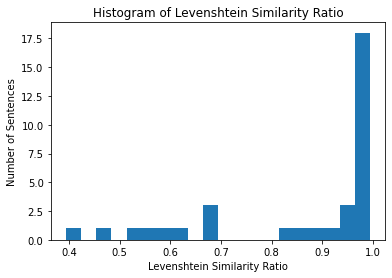

------------------------Calculated Sentences----------------------------
0 ہم کن خرافات، فروعات اور لغویات میں الجھے پھنسے اور دھنسے ہوئے ہیں ؟ 
1 ہمارے ایشوز کیا ہیں، موضوعات کیسے ہیں، ترجیحات کس نوعیت کی ہیں؟ 
2 دوسری طرف اصلی دنیا کس رفتار سے کن منزلوں کی طرف رواں دواں ہے ؟ 
3 یہ عجیب وغریب سا منظر دیکھ کر سوچتا ہوں کہ صرف 1 00سال بعد یہ اصلی دنیا کہاں اور کیسی ہو گی اور ہم کہاں اور کیسے حال میں ہوں گے ؟ 
4 مجھے اپنی جہالت کا احساس، ادراک اور اعتراف بھی ہے کہ میں کبھی سائنس سٹوڈنٹ نہیں رہا 
5 اس لئے دنیا کی سائنسی اڑان اور پیش رفت سے نہ ہونے کے برابر ہی واقف ہوں 
6 جدید سائنسی علوم کے ناموں سے بھی پوری طرح واقف نہیں لیکن جو ماڑا موٹا نہ ہونے کے برابر جانتا ہوں وہ بھی ڈرا دینے اور ہوش اڑا دینے کیلئے کافی ہے لیکن اس ملک کے لیڈروں کو دیکھو جو بھیانک ترین حقیقتوں سے بے خبر، بے نیاز نت نئے ڈرامے، نوٹنکیاں اور ٹھنڈ پروگرام پیش کر رہے ہیں 
7 انہیں نہ گزرے کل کی فکر نہ آنے والے کل کی پروا،ڈنگ ٹپائو قسم کے لوگوں کا اک ہجوم ہے جو صرف ، صرف اور صرف آج میں زندہ ہے 
8 قرضوں میں غرق، پینے کے صا

In [84]:
import csv

passage_number = 2 # <<---- You need to select passage 0-2 here. 

#-----------------------------No Need to change anything below this line-------------------------------
passage1 = samples["passages"][passage_number]["raw"]

#Step1: Passing text to pre-processing

text = pre_processing(passage1)


#Urduhackers: Output of urduhack library
#ownres: Output of my self-written library
#splitted: tokenized list of words
#text2: Modified Text after necessary addition/deletions 

#Step1: Generating the sentence tokens

urduhackres,ownres,splitted,text2 = sentence_tokenization(text)



#Step 3: Calculating Accuracy for the two passages. 

import matplotlib.pyplot as plt

count = 0
reference_Passage_1_0 = samples["passages"][passage_number]["tokenized"]
reference_Passage_1_0 = [x.replace('\xa0',' ') for x in reference_Passage_1_0]
lev = 0

sent_lev = calculate_similarity(ownres,reference_Passage_1_0)

print("The Average Accuracy of Sentences is: ",round(sum(sent_lev)/len(sent_lev)*100.3),"%")
plt.hist(sent_lev,bins = 20)
plt.title("Histogram of Levenshtein Similarity Ratio")
plt.xlabel("Levenshtein Similarity Ratio")
plt.ylabel("Number of Sentences")
plt.show()
print("------------------------Calculated Sentences----------------------------")
for i,j in enumerate(ownres):
  print(i,j)

print("------------------------Reference Sentences----------------------------")
for i,j in enumerate(reference_Passage_1_0):
  print(i,j)

print("------------------------Low Similarity(<0.6) Sentences-----------------------")
for i,j in enumerate(sent_lev):
  if(j<0.6):
    print(ownres[i],round(j,2))

##### Accuracy Testing Method 2 - Running Algorithm for all 1195 passages and calculating number of sentences

Caution: It takes too much time to run, so I have just pasted the results down below. 

In [26]:
import csv
try:
  import Levenshtein
except:
  !pip install python-Levenshtein
  import Levenshtein

with open('urdu-corpus.txt', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    passage = list(reader)
f.close()

len(passage)
  
  

########################################
##       Please Uncomment to run      ##
########################################
# values = []
# for i in range(1195):
#   text = passage[i][0]
#   text = pre_processing(text)
#   urduhackres, ownres, splitted, text2 = sentence_tokenization(text)
#   sent_lev = calculate_similarity(ownres,urduhackres)
#   try:
#     if(len(sent_lev)>0):
#       values.append([i,len(urduhackres),len(ownres),sum(sent_lev)/len(sent_lev)])
#   except:
#     print("Error-",i,"->",end="")
#     continue
#   print(i,"->",end="")

# import pickle
# with open('data.pkl', 'wb') as f:
#   pickle.dump(values, f)


0 ->1 ->2 ->3 ->4 ->5 ->6 ->7 ->8 ->9 ->10 ->11 ->12 ->13 ->14 ->15 ->16 ->17 ->18 ->19 ->20 ->21 ->22 ->23 ->24 ->25 ->26 ->27 ->28 ->29 ->30 ->31 ->32 ->33 ->34 ->35 ->36 ->37 ->38 ->39 ->40 ->41 ->42 ->43 ->44 ->45 ->46 ->47 ->48 ->49 ->50 ->51 ->52 ->53 ->54 ->55 ->56 ->[]
['ہمارے', 'پڑوسی', 'ملک', 'بھارت', 'کے', 'وزیراعظم', 'کی', 'تنخواہ', 'انڈیا', 'ٹائمز', 'کی', 'رپورٹ', 'کے', 'مطابق', 'دو', 'لاکھ', 'تریسٹھ', 'ہزار', 'روپے', 'ہے', 'تاہم', 'انہوں', 'نے', 'کبھی', 'منہ', 'پھاڑ', 'کر', 'اس', 'طرح', 'بات', 'نہیں', 'کی،', 'دوسری', 'طرف', 'غیر', 'ملکی', 'قرضوں', 'میں', 'جکڑے', 'پاکستان', 'کے', 'سرمایہ', 'داروں', 'کی', 'صورتحال', 'یہ', 'ہے', 'کہ', 'ایک', 'ہفتے', 'میں', 'چینی', '3', 'روپے', '60پیسے', 'فی', 'کلو', 'مہنگی', 'ہوگئی', 'ادارہ', 'شماریات', 'نے', 'اس', 'حوالے', 'سے', 'رپورٹ', 'جاری', 'کی', 'ہے', 'کہ', 'جس', 'میں', 'بتایا', 'گیا', 'ہے', 'کہ', 'ایک', 'سال', 'میں', 'چینی', '18روپے', '86پیسے', 'فی', 'کلو', 'مہنگی', 'ہوئی،', 'اسی', 'طر', 'ح', 'ایک', 'سال', 'میں', 'آٹے', 'کا', '20کلو'

--2021-03-20 19:06:16--  https://github.com/ahsanfarooqui/testrepo/blob/main/data.pkl
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.pkl’

data.pkl                [ <=>                ]  97.17K  --.-KB/s    in 0.04s   

2021-03-20 19:06:17 (2.53 MB/s) - ‘data.pkl’ saved [99506]



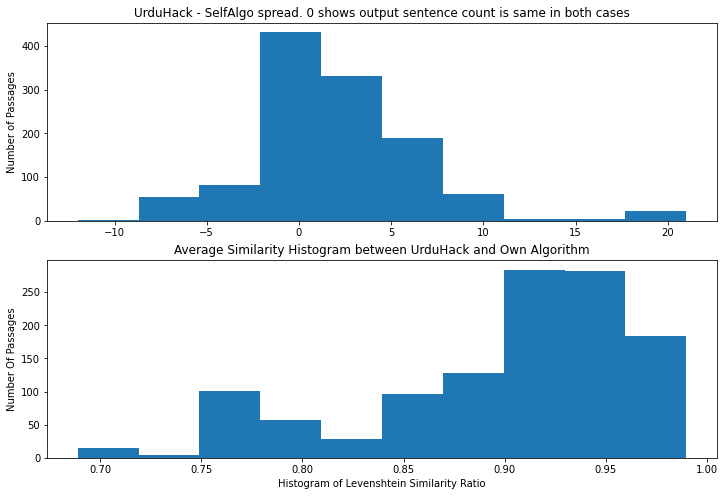

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

import pickle 


try:
  with open("data.pkl",'rb') as f:
    try:
      values = pickle.load(f)
    except:
      pass
except:
  !wget https://github.com/ahsanfarooqui/testrepo/blob/main/data.pkl
  with open("data.pkl",'rb') as f:
    try:
      values = pickle.load(f)
    except:
      pass
  

df = pd.DataFrame.from_records(values)
df.columns = ["PassageId","UrduHackSentenceCount","OwnAlgoSentenceCount","AverageSimilarity"]
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(211)
ax.set_title("UrduHack - SelfAlgo spread. 0 shows output sentence count is same in both cases")
ax.set_ylabel("Number of Passages")
ax.set_xlabel("")

ax2 = f.add_subplot(212)
ax2.set_title("Average Similarity Histogram between UrduHack and Own Algorithm")
ax2.set_xlabel("Histogram of Levenshtein Similarity Ratio")
ax2.set_ylabel("Number Of Passages")

#ax3 = f.add_subplot(313)
ax.hist(df["UrduHackSentenceCount"]-df["OwnAlgoSentenceCount"])
ax2.hist(df["AverageSimilarity"])
plt.show()
